In [35]:
import pandas as pd
import numpy as np

import seaborn as sn

In [36]:
new=pd.read_excel(r"C:\Users\Sawpnil\Downloads\Real estate valuation data set.xlsx")
new.head()

,age,distance_MRT,stores,latitude,longitude,house_price
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


# Correlation

In [37]:
new.corr()

,age,distance_MRT,stores,latitude,longitude,house_price
age,1.000000,0.024344,0.048563,0.054779,-0.048639,-0.213846
distance_MRT,0.024344,1.000000,-0.604995,-0.592053,-0.807056,-0.701939
stores,0.048563,-0.604995,1.000000,0.447329,0.449033,0.620631
latitude,0.054779,-0.592053,0.447329,1.000000,0.413913,0.564572
longitude,-0.048639,-0.807056,0.449033,0.413913,1.000000,0.554680
house_price,-0.213846,-0.701939,0.620631,0.564572,0.554680,1.000000


# Removing Outliers in the data

<AxesSubplot:xlabel='distance_MRT'>

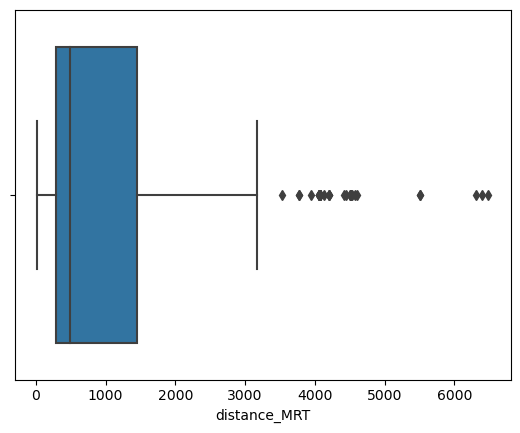

In [39]:
sns.boxplot(x='distance_MRT',data=new)

In [40]:
q1 = new['distance_MRT'].quantile(0.25)
q3 = new['distance_MRT'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

3205.5078

In [41]:
new['distance_MRT']=np.where(new['distance_MRT'] > upper_limit,upper_limit,new['distance_MRT'])

<AxesSubplot:xlabel='distance_MRT'>

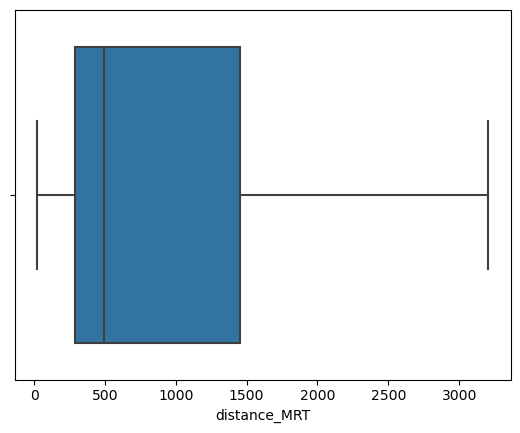

In [42]:
sns.boxplot(x='distance_MRT',data=new)

In [43]:
new.corr()

,age,distance_MRT,stores,latitude,longitude,house_price
age,1.000000,-0.005194,0.048563,0.054779,-0.048639,-0.213846
distance_MRT,-0.005194,1.000000,-0.646510,-0.581704,-0.762392,-0.733758
stores,0.048563,-0.646510,1.000000,0.447329,0.449033,0.620631
latitude,0.054779,-0.581704,0.447329,1.000000,0.413913,0.564572
longitude,-0.048639,-0.762392,0.449033,0.413913,1.000000,0.554680
house_price,-0.213846,-0.733758,0.620631,0.564572,0.554680,1.000000


<AxesSubplot:xlabel='latitude'>

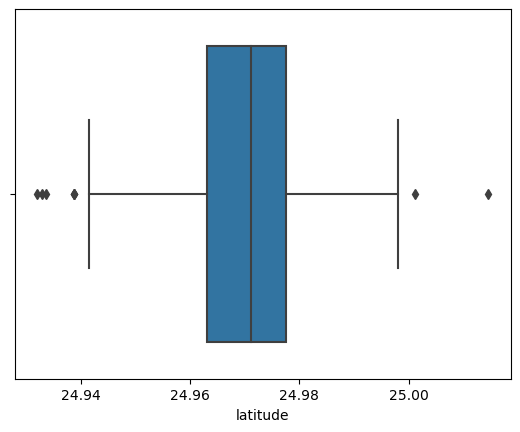

In [44]:
sns.boxplot(x='latitude',data=new)

In [45]:
q1 = new['latitude'].quantile(0.25)
q3 = new['latitude'].quantile(0.75)
iqr = q3-q1
low_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr 

In [46]:
new['latitude']=np.where(new['latitude'] > upper_limit,upper_limit,new['latitude'])
new['latitude']=np.where(new['latitude'] < low_limit,low_limit,new['latitude'])

<AxesSubplot:xlabel='latitude'>

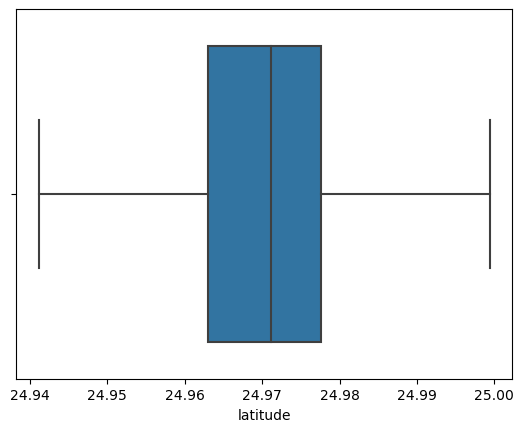

In [47]:
sns.boxplot(x='latitude',data=new)

<AxesSubplot:xlabel='longitude'>

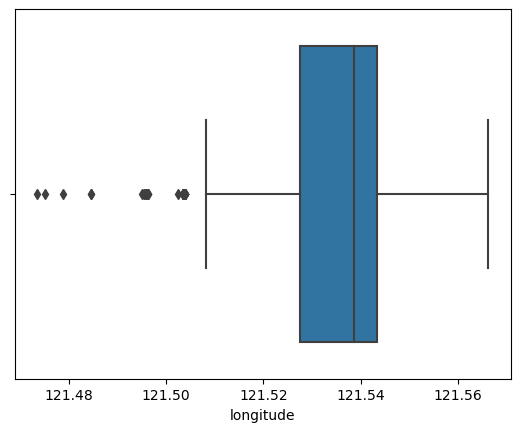

In [48]:
sns.boxplot(x='longitude',data=new)

In [49]:
q1 = new['longitude'].quantile(0.25)
q3 = new['longitude'].quantile(0.75)
iqr = q3-q1
low_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr 
new['longitude']=np.where(new['longitude'] > upper_limit,upper_limit,new['longitude'])
new['longitude']=np.where(new['longitude'] < low_limit,low_limit,new['longitude'])

<AxesSubplot:xlabel='longitude'>

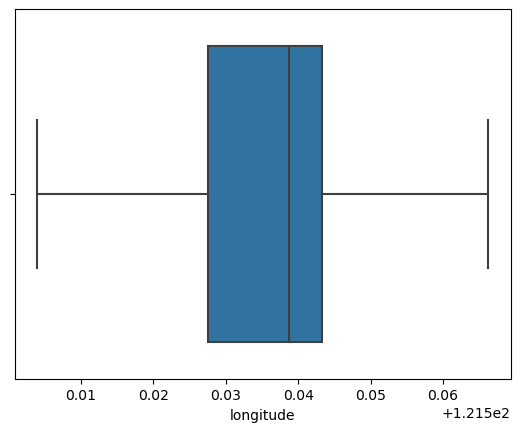

In [50]:
sns.boxplot(x='longitude',data=new)

In [51]:
new.corr()

,age,distance_MRT,stores,latitude,longitude,house_price
age,1.000000,-0.005194,0.048563,0.056169,-0.030090,-0.213846
distance_MRT,-0.005194,1.000000,-0.646510,-0.590310,-0.751744,-0.733758
stores,0.048563,-0.646510,1.000000,0.455083,0.450514,0.620631
latitude,0.056169,-0.590310,0.455083,1.000000,0.404720,0.578344
longitude,-0.030090,-0.751744,0.450514,0.404720,1.000000,0.546051
house_price,-0.213846,-0.733758,0.620631,0.578344,0.546051,1.000000


# Checking null values in the data

In [52]:
new.isna().sum()

age             0
distance_MRT    0
stores          0
latitude        0
longitude       0
house_price     0
dtype: int64

In [75]:
X = new.iloc[:,0:5]

y = new.iloc[:,5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [76]:
X

,age,distance_MRT,stores,latitude,longitude
0,32.0,84.87882,10,24.98298,121.540240
1,19.5,306.59470,9,24.98034,121.539510
2,13.3,561.98450,5,24.98746,121.543910
3,13.3,561.98450,5,24.98746,121.543910
4,5.0,390.56840,5,24.97937,121.542450
...,...,...,...,...,...
407,13.7,3205.50780,0,24.94155,121.503971
408,5.6,90.45606,9,24.97433,121.543100
409,18.8,390.96960,7,24.97923,121.539860
410,8.1,104.81010,5,24.96674,121.540670


# Splitting of the data into Train and Test data

In [77]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,house_price,age,distance_MRT,stores,latitude,longitude
51,20.7,31.3,1758.4060,1,24.95402,121.55282
332,22.8,30.0,1013.3410,5,24.99006,121.53460
163,55.2,0.0,185.4296,0,24.97110,121.53170
133,42.2,33.4,186.9686,6,24.96604,121.54211
244,40.8,7.5,639.6198,5,24.97258,121.54814


In [78]:
df.corr()

,house_price,age,distance_MRT,stores,latitude,longitude
house_price,1.000000,-0.209087,-0.732085,0.613502,0.593564,0.528755
age,-0.209087,1.000000,-0.023732,0.096122,0.063722,-0.045701
distance_MRT,-0.732085,-0.023732,1.000000,-0.656462,-0.644384,-0.719384
stores,0.613502,0.096122,-0.656462,1.000000,0.491890,0.439347
latitude,0.593564,0.063722,-0.644384,0.491890,1.000000,0.410550
longitude,0.528755,-0.045701,-0.719384,0.439347,0.410550,1.000000


# Checking multicollinearity in the data

In [79]:
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X1=df.drop(['house_price'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

age             3.536867e+00
distance_MRT    4.088686e+00
stores          5.272353e+00
latitude        6.625496e+06
longitude       6.626407e+06
dtype: float64

# Building multiple linear model on train data

In [94]:
import statsmodels.formula.api as smf
model2 = smf.ols('house_price ~ age + distance_MRT + stores + longitude + latitude',data=new).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            house_price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     155.8
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           4.26e-92
Time:                        11:08:58   Log-Likelihood:                -1419.4
No. Observations:                 412   AIC:                             2851.
Df Residuals:                     406   BIC:                             2875.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6585.4136   5134.424     -1.283      0.200   -1.67e+04    3507.961
age             -0.2727      0.033     -8.219      0.000      -0.338      -0.207
distance_MRT    -0.0059      0.001     -7.986      0.000      -0.007      -0.004
stores           1.0707      0.169      6.321      0.000       0.738       1.404
longitude        7.1120     40.975      0.174      0.862     -73.437      87.661
latitude       230.8933     38.990      5.922      0.000     154.247     307.540
==============================================================================
Omnibus:                      105.509   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.718
Skew:                           1.220   Prob(JB):                     5.49e-63
Kurtosis:                       6.279   Cond. No.                     1.88e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Removing insignificant independent variables from the data

In [80]:
import statsmodels.formula.api as smf
model2 = smf.ols('house_price ~ age + distance_MRT + stores',data=new).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            house_price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     229.4
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           3.54e-87
Time:                        11:04:09   Log-Likelihood:                -1436.5
No. Observations:                 412   AIC:                             2881.
Df Residuals:                     408   BIC:                             2897.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       44.9728      1.308     34.377      0.000      42.401      47.545
age             -0.2613      0.034     -7.596      0.000      -0.329      -0.194
distance_MRT    -0.0075      0.001    -14.160      0.000      -0.009      -0.006
stores           1.1849      0.175      6.786      0.000       0.842       1.528
==============================================================================
Omnibus:                       98.902   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.828
Skew:                           1.187   Prob(JB):                     3.07e-53
Kurtosis:                       5.908   Cond. No.                     4.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model fitted on train dataset is
Y=44.9728 - 0.2613 * age - 0.0075 * distant_MRT + 1.1849 * stores


In [81]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df

,house_price,age,distance_MRT,stores,latitude,longitude,fitted_value,residual
51,20.7,31.3,1758.4060,1,24.95402,121.552820,24.796726,-4.096726
332,22.8,30.0,1013.3410,5,24.99006,121.534600,35.461902,-12.661902
163,55.2,0.0,185.4296,0,24.97110,121.531700,43.582670,11.617330
133,42.2,33.4,186.9686,6,24.96604,121.542110,41.953736,0.246264
244,40.8,7.5,639.6198,5,24.97258,121.548140,44.142687,-3.342687
...,...,...,...,...,...,...,...,...
382,12.9,16.1,3205.5078,0,24.94297,121.503971,16.734533,-3.834533
223,46.0,34.5,324.9419,6,24.97814,121.541700,40.631938,5.368062
158,37.4,15.5,815.9314,4,24.97886,121.534640,39.545625,-2.145625
256,43.9,17.3,444.1334,1,24.97501,121.527300,38.307816,5.592184


# Checking assumptions

# Homoscedasticity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

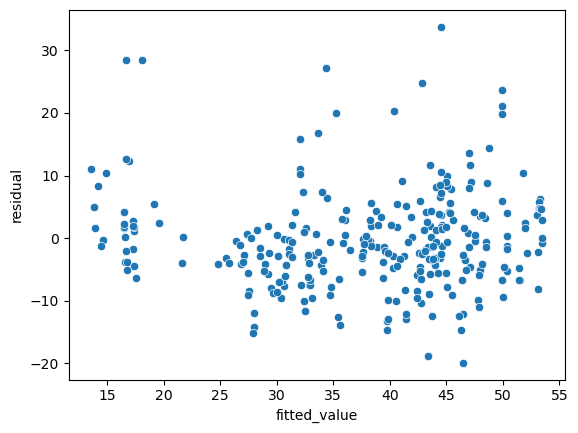

In [82]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

# Normality of residuals

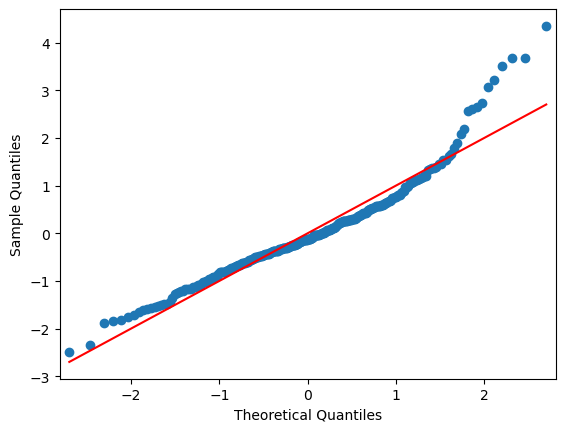

In [83]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model errors are IID

<AxesSubplot:ylabel='Frequency'>

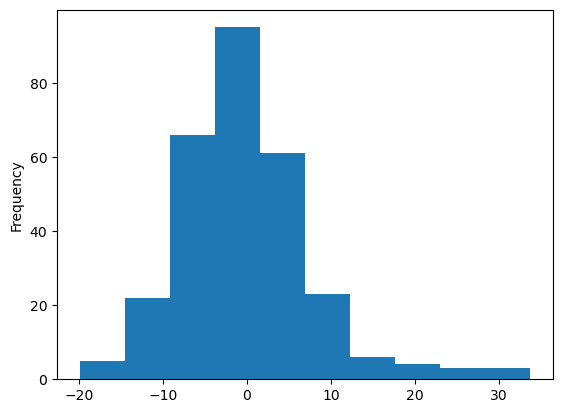

In [84]:
df['residual'].plot.hist()

In [85]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,age,distance_MRT,stores,latitude,longitude,house_price
409,18.8,390.9696,7,24.97923,121.53986,40.6
118,16.6,289.3248,5,24.98203,121.54348,59.6
34,15.4,205.3670,7,24.98419,121.54243,55.1
399,7.6,2175.0300,3,24.96305,121.51254,27.7
216,28.0,372.6242,6,24.97838,121.54119,40.8


In [86]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,age,distance_MRT,stores,latitude,longitude,house_price,Prediction
409,18.8,390.9696,7,24.97923,121.53986,40.6,45.424125
118,16.6,289.3248,5,24.98203,121.54348,59.6,44.391096
34,15.4,205.3670,7,24.98419,121.54243,55.1,47.703963
399,7.6,2175.0300,3,24.96305,121.51254,27.7,30.235773
216,28.0,372.6242,6,24.97838,121.54119,40.8,41.972849


In [87]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.house_price, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.63


In [88]:
from sklearn.metrics import r2_score
r2 = r2_score(df.house_price, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.63
